# Membres de l'équipe

- **SBAI Yahia**
- **CHBANI Wissal**
- **KI Alidou**
- **BAHAFID Salah-Eddine**


# Création de notre Dataset

Dans ce projet, nous étudions le cas de la ville de Paris, en France, avec pour objectif d'estimer le prix des biens immobiliers tout en prenant en compte les plans d'agglomération. Le principal défi est l'absence de données préexistantes intégrant l'environnement urbain. Nous avons donc constitué notre propre dataset en combinant plusieurs sources de données ouvertes et en effectuant du web scraping.

## Sources de Données Utilisées

1. **Données Foncières (DVF)**
   - **Source :** [data.gouv.fr](https://www.data.gouv.fr/fr/)
   - **Description :** Ensemble de données regroupant les valeurs foncières des biens immobiliers de la ville de Paris.
   
2. **Équipements Parisiens**
   - **Source :** [INSEE - Base BPE](https://www.insee.fr/fr/statistiques/8217525?sommaire=8217537&q=bpe)
   - **Description :** Données géolocalisées sur les équipements de la ville de Paris (commerce, services, sport, santé, etc.).
   
3. **Espaces Verts**
   - **Source :** [Open Data Paris - Espaces Verts](https://opendata.paris.fr/explore/dataset/espaces_verts/table/?disjunctive.type_ev&disjunctive.categorie&disjunctive.adresse_codepostal&disjunctive.presence_cloture)
   - **Description :** Informations sur les espaces verts parisiens, susceptibles d'influencer le prix des biens immobiliers.
   
4. **Monuments Parisiens**
   - **Source :** [Paris J'aime - Monuments](https://parisjetaime.com/article/les-monuments-parisiens-un-patrimoine-exceptionnel-a024)
   - **Description :** Extraction via web scraping des monuments les plus connus de Paris, pour intégrer des variables décrivant le patrimoine et l'environnement urbain.

## Processus de Création du Dataset

### Étape 1 : Nettoyage de la Base de Données DVF Géolocalisés
- **Objectif :** Préparer et nettoyer les données de la DVF pour assurer leur qualité.
- **Actions réalisées :**
  - Correction des erreurs et valeurs manquantes.
  - Formatage des dates et géolocalisation des biens.

### Étape 2 : Réalisation de la Base de Données des Équipements Parisiens Géolocalisés
- **Sous-étapes :**
  - **Équipements de la Base BPE :** Extraction des données sur les commerces, services, infrastructures sportives et sanitaires.
  - **Espaces Verts :** Récupération des données sur les espaces verts, identifiant les zones susceptibles d'influencer les prix immobiliers.
  - **Monuments :** Utilisation du web scraping pour extraire la localisation et d'autres informations pertinentes sur les monuments parisiens.

### Étape 3 : Lier les Données des Équipements aux Biens Immobiliers
- **Objectif :** Constituer un dataset de travail intégrant toutes les informations environnementales à côté des valeurs foncières.
- **Actions réalisées :**
  - Association des données géolocalisées des équipements, espaces verts et monuments aux données foncières.
  - Création des variables descriptives du quartier (proximité d'équipements, densité des espaces verts, présence de monuments, etc.).

---


### Import des modules nécessaires

In [77]:
import pandas as pd
import numpy as np 
import math
from numpy import cos, sin, arcsin, sqrt
from math import radians
from pyproj import Transformer
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Pre-processing des données DVF

In [80]:

df_biens = pd.read_csv('75_23.csv',sep=',', low_memory=False)
df_biens


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-1317095,2023-01-03,1,Vente,1825000.0,89.0,NaN,RUE SAINT-DENIS,8525,75001.0,...,Local industriel. commercial ou assimilé,165.0,0.0,NaN,NaN,NaN,NaN,NaN,2.349112,48.862083
1,2023-1317096,2023-01-05,1,Vente,567000.0,51.0,NaN,RUE DE L ECHIQUIER,3084,75010.0,...,Local industriel. commercial ou assimilé,52.0,0.0,NaN,NaN,NaN,NaN,NaN,2.348283,48.871818
2,2023-1317097,2023-01-04,1,Vente,140000.0,178.0,NaN,RUE DE COURCELLES,2387,75017.0,...,Appartement,18.0,1.0,NaN,NaN,NaN,NaN,NaN,2.298612,48.884255
3,2023-1317098,2023-01-05,1,Vente,400000.0,12.0,NaN,RUE TURGOT,9508,75009.0,...,Appartement,43.0,1.0,NaN,NaN,NaN,NaN,NaN,2.345859,48.880564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80746,2023-1356410,2023-10-05,1,Adjudication,9000000.0,118.0,NaN,RUE D ASSAS,0499,75006.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,365.0,2.334597,48.841934
80747,2023-1356411,2023-09-25,1,Vente,80000.0,6.0,NaN,BD RICHARD LENOIR,8208,75011.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.370190,48.854243
80748,2023-1356411,2023-09-25,1,Vente,80000.0,6.0,NaN,BD RICHARD LENOIR,8208,75011.0,...,Appartement,10.0,1.0,NaN,NaN,NaN,NaN,NaN,2.370190,48.854243
80749,2023-1356412,2023-11-30,1,Adjudication,328000.0,62.0,NaN,BD DE L HOPITAL,4649,75013.0,...,Local industriel. commercial ou assimilé,70.0,0.0,NaN,NaN,NaN,NaN,NaN,2.359846,48.838166


In [82]:
df_biens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80750 entries, 0 to 80749
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   80750 non-null  object 
 1   date_mutation                 80750 non-null  object 
 2   numero_disposition            80750 non-null  int64  
 3   nature_mutation               80750 non-null  object 
 4   valeur_fonciere               80187 non-null  float64
 5   adresse_numero                80546 non-null  float64
 6   adresse_suffixe               3442 non-null   object 
 7   adresse_nom_voie              80553 non-null  object 
 8   adresse_code_voie             80553 non-null  object 
 9   code_postal                   80551 non-null  float64
 10  code_commune                  80750 non-null  int64  
 11  nom_commune                   80750 non-null  object 
 12  code_departement              80750 non-null  int64  
 13  a

### Suppression des colonnes inutiles 

Il y a beaucoup de colonnes inutiles: 
- id_mutation : identifiant non stable
- numero_disposition 
- adresse_numero
- adresse_suffixe
- adresse_code_voie : Code FANTOIR de la voie
- adresse_nom_voie 
- code_commune
- nom_commune : Nom de la commune (accentué)
- ancien_code_commune : Ancien code commune INSEE (si différent lors de la mutation)
- ancien_nom_commune
- code_departement
- id_parcelle
- ancien_id_parcelle
- numero_volume
- les colonnes *lots*
- les colonnes *nature_culture*
- surface_terrain

In [86]:
df_biens.drop(columns=['id_mutation', 'numero_disposition','adresse_numero','adresse_suffixe','adresse_code_voie',
    'adresse_nom_voie','code_commune','nom_commune', 'ancien_code_commune','ancien_nom_commune','code_departement',
    'id_parcelle','ancien_id_parcelle','numero_volume','lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 
    'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez','lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
    'lot5_surface_carrez','nombre_lots', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain'],inplace=True)

In [88]:
df_biens = df_biens.dropna()

In [90]:
df_appart=df_biens.loc[df_biens['nature_mutation']=='Vente'].copy()
df_appart.reset_index(inplace=True, drop=True)
df_appart.drop(columns=['nature_mutation','code_type_local'],inplace=True)
df_appart

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2023-01-03,1825000.0,75001.0,Local industriel. commercial ou assimilé,165.0,0.0,2.349112,48.862083
1,2023-01-05,567000.0,75010.0,Local industriel. commercial ou assimilé,52.0,0.0,2.348283,48.871818
2,2023-01-04,140000.0,75017.0,Appartement,18.0,1.0,2.298612,48.884255
3,2023-01-05,400000.0,75009.0,Appartement,43.0,1.0,2.345859,48.880564
...,...,...,...,...,...,...,...,...
39637,2023-12-01,285000.0,75012.0,Appartement,47.0,3.0,2.383969,48.844180
39638,2023-12-28,245000.0,75016.0,Appartement,35.0,1.0,2.279636,48.868498
39639,2023-12-15,338000.0,75007.0,Appartement,28.0,2.0,2.309792,48.860374
39640,2023-09-25,80000.0,75011.0,Appartement,10.0,1.0,2.370190,48.854243


#### Correction du type de données


In [93]:
df_appart['code_postal']=df_appart['code_postal'].astype(int)
df_appart['nombre_pieces_principales']=df_appart['nombre_pieces_principales'].astype(int)
df_appart

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564
...,...,...,...,...,...,...,...,...
39637,2023-12-01,285000.0,75012,Appartement,47.0,3,2.383969,48.844180
39638,2023-12-28,245000.0,75016,Appartement,35.0,1,2.279636,48.868498
39639,2023-12-15,338000.0,75007,Appartement,28.0,2,2.309792,48.860374
39640,2023-09-25,80000.0,75011,Appartement,10.0,1,2.370190,48.854243


on obtient la première partie de notre dataset final c'est-à-dire , celui des **ventes d'appartement,Local industriel. commercial ou assimilé et Maison à Paris en 2023** 

## 2. Mise en place des données des équipements

### a) Utilisation des données BPE

In [98]:

df_equip=pd.read_csv('BPE23.csv',sep=';')
df_equip

/var/folders/13/nr7x787j25532153yb9_gk100000gn/T/ipykernel_51323/3200768291.py:1: DtypeWarning: Columns (10,11,58,61,63,65,67,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_equip=pd.read_csv('BPE23.csv',sep=';')


,AN,NOMRS,CNOMRS,NUMVOIE,INDREP,TYPVOIE,LIBVOIE,CADR,LIBCOM,CODPOS,...,QVA,QUALI_QVA,ZUS,QUALI_ZUS,EPCI,UU2020,BV2022,AAV2020,DENS3,DENS7
0,2023,COMMISSARIAT DE POLICE DE POINTE À PITRE,NaN,NaN,NaN,NaN,QUARTIER LAFOND,NaN,LES ABYMES,97139.0,...,IND,3,IND,3,200018653,9A701,97101,9A1,2,2
1,2023,DIR REG FINANCES PUBLIQUES GUADELOUPE,SCE IMPOTS DES ENTREPRISES GRANDE TERRE NORD,NaN,NaN,RUE,DES FINANCES,CTRE FINANCES PUBLIQUES,LES ABYMES,97139.0,...,CSZ,_Z,HZ,1,200018653,9A701,97101,9A1,2,2
2,2023,DIR REG FINANCES PUBLIQUES GUADELOUPE,CFD DE ANTILLES-GUYANE,NaN,NaN,NaN,BOISRIPEAUX,RESIDENCE LES MOUFFIAS,LES ABYMES,97139.0,...,CSZ,_Z,HZ,3,200018653,9A701,97101,9A1,2,2
3,2023,APE ABYMES DOTHEMARE,NaN,16.0,NaN,ZAC,DE DOTHEMARE,ROND POINT DOTHEMARE,LES ABYMES,97139.0,...,CSZ,_Z,HZ,1,200018653,9A701,97101,9A1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773451,2023,SONNEVELD MARJAN,NaN,NaN,NaN,NaN,PENTI ROSSI,NaN,CHISA,20240.0,...,CSZ,_Z,CSZ,_Z,200033827,CSZ,2B251,CSZ,3,6
2773452,2023,CANYON DU TRAVU,NaN,NaN,NaN,NaN,NaN,NaN,CHISA,20240.0,...,CSZ,_Z,CSZ,_Z,200033827,CSZ,2B251,CSZ,3,6
2773453,2023,SITE D'ESCALADE DE CHISA VILLAGE,SITE DE CASTEL DE CHISA,NaN,NaN,NaN,NaN,NaN,CHISA,20240.0,...,CSZ,_Z,CSZ,_Z,200033827,CSZ,2B251,CSZ,3,6
2773454,2023,VIA FERRATA,NaN,NaN,NaN,NaN,NaN,NaN,CHISA,20240.0,...,CSZ,_Z,CSZ,_Z,200033827,CSZ,2B251,CSZ,3,6


#### Pre-processing


In [100]:
#selection des données de Paris uniquement
df_equip=df_equip.loc[df_equip['DEP']==75].copy()

df_equip.reset_index(inplace=True,drop=True)

# Ajout de la colonne "code postal"
code=df_equip['DEPCOM']-100
df_equip.insert(0,'code_postal',code.tolist())

#suppression des colonnes inutiles
df_equip = df_equip[["code_postal", "LAMBERT_X", "LAMBERT_Y", "QUALITE_XY", "TYPEQU"]]
df_equip

,code_postal,LAMBERT_X,LAMBERT_Y,QUALITE_XY,TYPEQU
0,75001,651008.65,6863205.96,B,A101
1,75001,651918.25,6862048.57,B,A101
2,75001,651824.33,6861891.25,B,A101
3,75001,650989.02,6862591.21,M,A101
...,...,...,...,...,...
126920,75020,656819.76,6862399.31,B,G105
126921,75020,655315.10,6862260.80,B,G105
126922,75020,656548.90,6862341.70,B,G105
126923,75020,656172.58,6862403.01,B,G105


In [101]:
#suppression des données non géolocalisées
pas_loc_idx=df_equip.index[df_equip['QUALITE_XY']=='_Z'].tolist()
df_equip.drop(index=pas_loc_idx,inplace=True)

#### Les différents type d'équipement

In [103]:
#Création d'une nouvelle colonne Groupe avec l'unique valeur None
df_equip.insert(1, 'Groupe', None)
df_equip

,code_postal,Groupe,LAMBERT_X,LAMBERT_Y,QUALITE_XY,TYPEQU
0,75001,None,651008.65,6863205.96,B,A101
1,75001,None,651918.25,6862048.57,B,A101
2,75001,None,651824.33,6861891.25,B,A101
3,75001,None,650989.02,6862591.21,M,A101
...,...,...,...,...,...,...
126920,75020,None,656819.76,6862399.31,B,G105
126921,75020,None,655315.10,6862260.80,B,G105
126922,75020,None,656548.90,6862341.70,B,G105
126923,75020,None,656172.58,6862403.01,B,G105


# Catégorisation des Équipements

Dans cette partie, nous allons nous focaliser sur différentes catégories d'équipements telles que : **Sports**,**Services / Commerces**,...


Afin de faciliter l'analyse, nous avons regroupé certaines sous-catégories issues des données BPE pour obtenir des catégories bien distinctes. Cette approche permet d'avoir une vision synthétique et claire de l'environnement urbain et de mieux comprendre l'impact de chaque type d'équipement sur les prix immobiliers.

Les données du BPE utilisent des annotations pour expliquer la signification des variables. Ces annotations se trouvent dans le fichier [`BPE23_anonymisee_dictionnaire_variables.html`](BPE23_anonymisee_dictionnaire_variables.html).

## Dictionnaire des Variables BPE

Pour mieux visualiser et comprendre ces annotations, voici une capture d'écran extraite du dictionnaire :

![Capture d'écran du dictionnaire BPE](capture_dictionnaire.png)



##### Focus sur le sport (catégorie F1)

In [106]:
df_sport=df_equip.loc[df_equip['TYPEQU'].str.contains("F1")] # F1-- = installations sportives
pd.set_option('display.max_rows', 19)
df_sport['TYPEQU'].value_counts()

TYPEQU
F121    263
F111    245
F120    244
F112    220
F114    132
       ... 
F108      5
F110      2
F104      2
F118      2
F125      1
Name: count, Length: 22, dtype: int64

In [107]:
#suppression des équipements sportifs pas assez représentatifs (trop spécifiques, pas assez nombreux...)

#F102 = boulodrome
index=df_equip.index[df_equip['TYPEQU']=='F102'].tolist()

df_equip.drop(index=index,inplace=True)
df_equip.reset_index(inplace=True,drop=True)

In [108]:
#regroupement des équipements sportifs simmilaires


##salles des sports

#salles spécialisées
salle_idx=df_equip.index[df_equip['TYPEQU']=='F112'].tolist()
#salles de combat
salle_idx+=df_equip.index[df_equip['TYPEQU']=='F114'].tolist()
#salles non spécialisées
salle_idx+=df_equip.index[df_equip['TYPEQU']=='F116'].tolist()
#salles de remise en forme
salle_idx+=df_equip.index[df_equip['TYPEQU']=='F120'].tolist()
#gymnase
salle_idx+=df_equip.index[df_equip['TYPEQU']=='F121'].tolist()

df_equip.loc[salle_idx,'Groupe']='Salle de sport'

##équipements sportifs extérieurs

#Athlétisme
ext_idx=df_equip.index[df_equip['TYPEQU']=='F107'].tolist()
#Tennis
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F103'].tolist()
#terrain de grands jeux
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F113'].tolist()
#skate park
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F117'].tolist()
#Plateaux et terrains de jeux extérieurs
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F111'].tolist()
#Parcours sportif/santé
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F109'].tolist()
#Terrain de golf
ext_idx+=df_equip.index[df_equip['TYPEQU']=='F108'].tolist()

df_equip.loc[ext_idx,'Groupe']='Equipements sportifs extérieurs'

#natation
natation_idx=df_equip.index[df_equip['TYPEQU']=='F101'].tolist()
df_equip.loc[natation_idx,'Groupe']='Piscine'

##### Focus sur la santé (catégorie D)

In [110]:
##médecins (D2--)
df_medecin=df_equip.loc[df_equip['TYPEQU'].str.contains("D2")]
count=df_medecin['TYPEQU'].value_counts()
medecin_idx=count.index.tolist()
print(medecin_idx)

#généraliste
generaliste_idx=df_equip.index[df_equip['TYPEQU']=='D201'].tolist()
medecin_idx.remove('D201')

df_equip.loc[generaliste_idx,'Groupe']='Généraliste'

#medecins spécialistes + autre
specialiste_idx=[]
for e in medecin_idx:
    specialiste_idx+=df_equip.index[df_equip['TYPEQU']==e].tolist()

df_equip.loc[specialiste_idx,'Groupe']='Médecine spécialisée'

    
##pharmacie (D307)
pharmacie_idx=df_equip.index[df_equip['TYPEQU']=='D307'].tolist()
df_equip.loc[pharmacie_idx,'Groupe']='Pharmacie'

#urgences (D107)
hopital_idx=df_equip.index[df_equip['TYPEQU']=='D106'].tolist()
df_equip.loc[hopital_idx,'Groupe']='Urgences'

['D233', 'D243', 'D201', 'D221', 'D244', 'D207', 'D235', 'D237', 'D212', 'D214', 'D208', 'D202', 'D203', 'D231', 'D242', 'D210', 'D206', 'D209', 'D240', 'D236', 'D213', 'D238', 'D239', 'D211']


In [111]:
df_equip

,code_postal,Groupe,LAMBERT_X,LAMBERT_Y,QUALITE_XY,TYPEQU
0,75001,None,651008.65,6863205.96,B,A101
1,75001,None,651918.25,6862048.57,B,A101
2,75001,None,651824.33,6861891.25,B,A101
3,75001,None,650989.02,6862591.21,M,A101
4,75001,None,651892.50,6862584.50,B,A101
...,...,...,...,...,...,...
126862,75020,None,656689.20,6862113.80,B,G105
126863,75020,None,656819.76,6862399.31,B,G105
126864,75020,None,655315.10,6862260.80,B,G105
126865,75020,None,656548.90,6862341.70,B,G105


##### Focus sur l'enseignement (catégorie C)

In [113]:
#D502 = Crèche
creche_idx=df_equip.index[df_equip['TYPEQU']=='D502'].tolist()
df_equip.loc[creche_idx,'Groupe']='Crèche'

#Maternelle
maternelle_idx=df_equip.index[df_equip['TYPEQU']=='C101'].tolist()
df_equip.loc[maternelle_idx,'Groupe']='Maternelle'

#Primaire
prim_idx=df_equip.index[df_equip['TYPEQU']=='C104'].tolist()
df_equip.loc[prim_idx,'Groupe']='Primaire'

#Collège
college_idx=df_equip.index[df_equip['TYPEQU'].str.contains("C2")].tolist()
df_equip.loc[college_idx,'Groupe']='Collège'

#Lycée
redondant=df_equip.index[df_equip['TYPEQU']=="C305"].tolist()
df_equip.drop(index=redondant,inplace=True)
lycee_idx=df_equip.index[df_equip['TYPEQU'].str.contains("C3")].tolist()
df_equip.loc[lycee_idx,'Groupe']='Lycée'

#Enseignements supérieurs
sup_idx=df_equip.index[df_equip['TYPEQU'].str.contains("C5")].tolist()
sup_idx+=df_equip.index[df_equip['TYPEQU'].str.contains("C4")].tolist()
df_equip.loc[sup_idx,'Groupe']='Enseignement supérieur'

##### Focus sur les divertissements culturelles (catégorie F)

In [115]:
#bowling F119
div_idx=df_equip.index[df_equip['TYPEQU']=='F119'].tolist()

#le reste (cinema, théatre, lieux d'exposition...)
div_idx+=df_equip.index[df_equip['TYPEQU'].str.contains("F3")].tolist()

df_equip.loc[div_idx,'Groupe']='Divertissement Culturelle'

##### Focus sur les services/commerces

In [117]:
#banque
banque_idx=df_equip.index[df_equip['TYPEQU']=='A203'].tolist()
df_equip.loc[banque_idx,'Groupe']='Banque'

#poste
poste_idx=df_equip.index[df_equip['TYPEQU']=='A206'].tolist()
poste_idx+=df_equip.index[df_equip['TYPEQU']=='A207'].tolist()
poste_idx+=df_equip.index[df_equip['TYPEQU']=='A208'].tolist()
df_equip.loc[poste_idx,'Groupe']='Poste'

#Restaurants
resto_idx=df_equip.index[df_equip['TYPEQU']=='A504'].tolist()
df_equip.loc[resto_idx,'Groupe']='Restaurant'

#agence immobilière
immo_idx=df_equip.index[df_equip['TYPEQU']=='A505'].tolist()
df_equip.loc[immo_idx,'Groupe']='Agence immobilière'

##Commerces alimentaires
alim_idx=df_equip.index[df_equip['TYPEQU']=='B101'].tolist()
alim_idx+=df_equip.index[df_equip['TYPEQU']=='B102'].tolist()
alim_idx+=df_equip.index[df_equip['TYPEQU'].str.contains("B2")].tolist()
df_equip.loc[alim_idx,'Groupe']='Commerce alimentaire'

#boulangerie
boul_idx=df_equip.index[df_equip['TYPEQU']=='B203'].tolist()
df_equip.loc[boul_idx,'Groupe']='Boulangerie'

#Commerces (vêtements, chaussures...)
sta_idx=df_equip.index[df_equip['TYPEQU']=='B316'].tolist()
df_equip.drop(index=sta_idx,inplace=True)
commerce_idx=df_equip.index[df_equip['TYPEQU'].str.contains("B3")].tolist()
df_equip.loc[commerce_idx,'Groupe']='Commerce'

In [118]:
pd.set_option('display.max_rows', 20)
df_equip.drop_duplicates(keep = 'first', inplace=True)
df_equip.dropna(axis=0,inplace=True)
df_equip['Groupe'].value_counts()

Groupe
Commerce                           16221
Restaurant                         14786
Médecine spécialisée                9971
Commerce alimentaire                7217
Agence immobilière                  5394
Généraliste                         1525
Banque                              1226
Salle de sport                       946
Pharmacie                            890
Crèche                               799
Enseignement supérieur               652
Equipements sportifs extérieurs      474
Divertissement Culturelle            337
Lycée                                230
Collège                              224
Poste                                190
Piscine                               85
Urgences                              16
Name: count, dtype: int64

##### Mise en forme finale

In [120]:
#conversion Lambert to latitude/longitude
transformer = Transformer.from_crs('epsg:2154', 'epsg:4326')
df_equip['Latitude'], df_equip['Longitude'] = transformer.transform(df_equip['LAMBERT_X'].tolist(), df_equip['LAMBERT_Y'].tolist())

In [121]:
#suppression des colonnes inutiles
df_equip.drop(columns=['LAMBERT_X','LAMBERT_Y','QUALITE_XY','TYPEQU','code_postal'],inplace=True)
df_equip.reset_index(inplace=True,drop=True)

### b) Utilisations du dataset *Monuments*

Nous avons crée notre propre dataset *Monuments* car nous souhaitons seulement sélectionner les plus connus. 
Nous avons utiliser le classement du site web (https://www.parisinfo.com/decouvrir-paris/musees-monuments-patrimoine-paris/monuments/les-monuments-parisiens-un-patrimoine-exceptionnel) pour établir une liste de 32 monuments qui nous semblaient les plus connus.
Pour obtenir leur cordonnée GPS, nous avons utiliser le site web (https://www.coordonnees-gps.fr/) qui calcule les cordonnées GPS d'une adresse. 

In [124]:
df_monuments=pd.read_csv('monuments.csv')
df_monuments

,Monuments,Adresse,Latitude,Longitude
0,Tour Eiffel,"Champ de Mars, 5 Avenue Anatole France, 75007 ...",48.8584,2.2945
1,Cathédrale Notre-Dame de Paris,"6 Parvis Notre-Dame - Pl. Jean-Paul II, 75004 ...",48.8530,2.3499
2,Arc de Triomphe,"Place Charles de Gaulle, 75008 Paris, France",48.8738,2.2950
3,Sacré-Cœur,"35 Rue du Chevalier de la Barre, 75018 Paris, ...",48.8867,2.3431
4,Musée du Louvre,"Rue de Rivoli, 75001 Paris, France",48.8606,2.3376
...,...,...,...,...
27,Église Saint-Sulpice,"2 Rue Palatine, 75006 Paris, France",48.8510,2.3331
28,Musée d'Orsay,"1 Rue de la Légion d'Honneur, 75007 Paris, France",48.8599,2.3266
29,Musée Rodin,"79 Rue de Varenne, 75007 Paris, France",48.8556,2.3157
30,Cimetière du Père-Lachaise,"16 Rue du Repos, 75020 Paris, France",48.8614,2.3933


In [125]:
df_monuments.insert(0,'Groupe','Monument')
df_monuments.drop(columns=['Monuments'],inplace=True)
df_monuments.drop(columns=['Adresse'],inplace=True)
df_monuments

,Groupe,Latitude,Longitude
0,Monument,48.8584,2.2945
1,Monument,48.8530,2.3499
2,Monument,48.8738,2.2950
3,Monument,48.8867,2.3431
4,Monument,48.8606,2.3376
...,...,...,...
27,Monument,48.8510,2.3331
28,Monument,48.8599,2.3266
29,Monument,48.8556,2.3157
30,Monument,48.8614,2.3933


### c) Utilisations du dataset *Espaces verts*

In [134]:
df_parc=gpd.read_file('espaces_verts.shp', encoding='utf-8')
df_parc.head()

,nsq_espace_,nom_ev,type_ev,categorie,adresse_num,adresse_com,adresse_typ,adresse_lib,adresse_cod,poly_area,...,id_division,id_atelier_,ida3d_enb,site_villes,id_eqpt,competence,url_plan,last_edited,last_edited,geometry
0,11825,JARDINIERES DE LA PORTE DE SAINT CLOUD,Décorations sur la voie publique,Jardiniere,6,V,AVENUE DE LA,PORTE DE SAINT CLOUD,75016,1401,...,116,32,JDE10411,SV,10411,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"MULTIPOLYGON (((2.25428 48.83816, 2.25428 48.8..."
1,None,JARDINIERES DE LA RUE THIMONNIER,Décorations sur la voie publique,Jardiniere,1,None,RUE,THIMONNIER,75009,None,...,104,8,JDE16167,SV,16167,CA,None,None,None,"POLYGON ((2.3474 48.88006, 2.34741 48.88005, 2..."
2,None,JARDINIERES EVQ DE LA RUE AMBROISE PARE,Décorations sur la voie publique,Jardiniere,1,None,RUE,AMBROISE PARE,75010,None,...,104,10,JDE16168,SV,16168,CA,None,None,None,"POLYGON ((2.354 48.88177, 2.35401 48.88175, 2...."
3,1,JARDIN NELSON MANDELA,Promenades ouvertes,Jardin,32,None,RUE,BERGER,75001,19366,...,101,1,41598,2157,4953,CP,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"MULTIPOLYGON (((2.34379 48.8631, 2.34381 48.86..."
4,None,JARDINIERES VGA DU BOULEVARD DE LA BASTILLE,Décorations sur la voie publique,Jardiniere,2,None,BOULEVARD,DE LA BASTILLE,75012,None,...,111,15,JDE12818,SV,12818,CA,None,None,None,"POLYGON ((2.36704 48.84657, 2.36705 48.84656, ..."


In [146]:
df_parc.columns

Index(['nsq_espace_', 'nom_ev', 'type_ev', 'categorie', 'adresse_num',
       'adresse_com', 'adresse_typ', 'adresse_lib', 'adresse_cod', 'poly_area',
       'surface_tot', 'surface_hor', 'presence_cl', 'perimeter', 'annee_ouver',
       'annee_renov', 'ancien_nom_', 'annee_chang', 'nb_entites',
       'ouvert_ferm', 'id_division', 'id_atelier_', 'ida3d_enb', 'site_villes',
       'id_eqpt', 'competence', 'url_plan', 'last_edited', 'last_edited',
       'geometry'],
      dtype='object')

#### Pre-processing
Cette partie se fera en deux étapes qui sont :
- Sélection que des données de Paris
- Suppresion des données des espaces vertes uniquement décoratifs

In [149]:
df_parc=df_parc.loc[df_parc['adresse_cod'].astype(str).str.contains(r'^75', regex = True)]
df_parc['adresse_cod'].value_counts()

adresse_cod
75013    235
75019    227
75020    226
75018    208
75012    189
75015    181
75014    175
75016    166
75017    157
75011    135
75005     95
75010     86
75009     67
75004     63
75007     51
75008     45
75006     41
75003     39
75002     24
75001     14
Name: count, dtype: int64

### Création du Tableau Croisé des Espaces Verts

Dans cette section, nous construisons un tableau croisé dynamique qui récapitule le nombre d'occurrences de chaque **Catégorie** en fonction de chaque **Typologie d'espace vert**. 

#### Objectif

L'objectif principal est d'identifier les typologies d'espaces verts qui correspondent uniquement à des éléments décoratifs, c'est-à-dire ceux qui n'offrent pas de fonctions utilitaires ou opérationnelles, mais qui sont présents principalement pour leur aspect esthétique.


In [152]:
cross_tab_prop = pd.crosstab(index=df_parc[('type_ev')],
                             columns=df_parc["categorie"])
#affichage de la crosstable
cross_tab_prop.head()

categorie,Arboretum,Archipel,Bois,CA,CZ,Cimetière,Decoration,Espace Vert,Esplanade,Ile,...,Mail,Murs vegetalises,Parc,Pelouse,Plate-bande,Promenade,Square,Talus,Terrain de boules,Terre-plein
type_ev,,,,,,,,,,,,,,,,,,,,,
Bois,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cimetières,0,0,0,0,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Décorations sur la voie publique,0,0,0,9,1,0,76,0,0,0,...,2,0,0,2,24,0,1,7,0,1
"Ephémères, partagés, pédagogiques",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Etablissements sportifs,0,0,0,0,0,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0


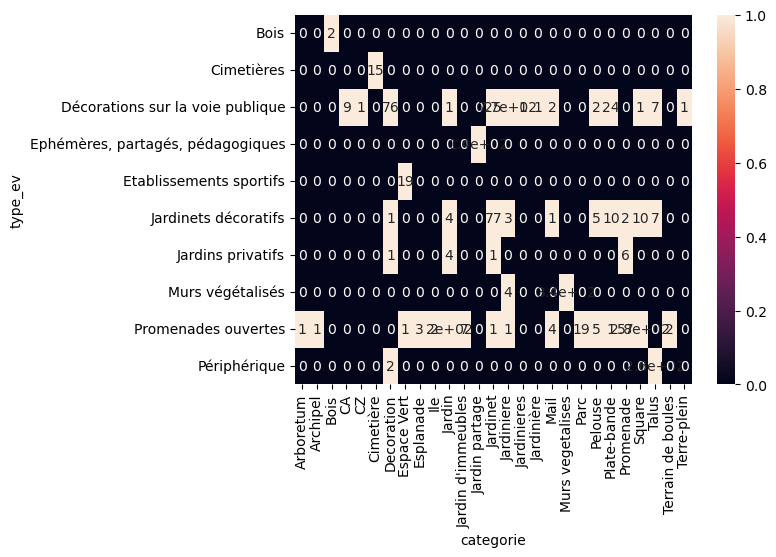

In [154]:

sns.heatmap(cross_tab_prop, annot=True, vmax=1)
plt.show()

#### Analyse et Nettoyage des Catégories d'Espaces Verts

À partir de l'analyse de la heatmap, plusieurs observations clés nous permettent de simplifier notre dataset en supprimant certaines catégories jugées non pertinentes :

- **Décorations sur la voie publique** et **Murs végétabilisés**  
  Ces catégories ne représentent pas de véritables espaces verts, mais uniquement des éléments décoratifs.  
  *Action : Suppression de ces catégories.*

- **Typologie d'espace vert "Périphérique"**  
  Cette typologie se compose exclusivement d'éléments décoratifs (par exemple, talus et décorations).  
  *Action : Suppression de cette catégorie.*

- **Établissements scolaires** et **Établissements sportifs**  
  Les informations concernant ces typologies d'espaces verts se révèlent redondantes avec celles du dataset DVF.  
  *Action : Suppression de ces catégories.*

Ces ajustements permettent de concentrer l'analyse sur les espaces verts ayant un impact réel sur l'environnement et, par conséquent, sur la valorisation immobilière.


In [157]:
mask = df_parc["type_ev"].isin(['Promenades ouvertes','Ephémères, partagés, pédagogiques',
    'Jardinets décoratifs','Cimetières','Jardins privatifs' ,'Bois'])
df_parc=df_parc.loc[mask].copy().reset_index(drop=True)
df_parc

,nsq_espace_,nom_ev,type_ev,categorie,adresse_num,adresse_com,adresse_typ,adresse_lib,adresse_cod,poly_area,...,id_division,id_atelier_,ida3d_enb,site_villes,id_eqpt,competence,url_plan,last_edited,last_edited,geometry
0,1,JARDIN NELSON MANDELA,Promenades ouvertes,Jardin,32,None,RUE,BERGER,75001,19366,...,101,1,41598,2157,4953,CP,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"MULTIPOLYGON (((2.34379 48.8631, 2.34381 48.86..."
1,237,SQUARE GUSTAVE MESUREUR,Promenades ouvertes,Square,105,None,RUE,JEANNE D ARC,75013,3195,...,113,18,52462,3064,3603,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.36285 48.83367, 2.36286 48.83366, ..."
2,918,CIMETIERE DU CALVAIRE,Cimetières,Cimetière,2,None,RUE DU,MONT CENIS,75018,635,...,16,160,62672,4139,5078,CP,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.34158 48.88679, 2.34159 48.88681, ..."
3,13005,JARDIN PARTAGE FORCEVAL,"Ephémères, partagés, pédagogiques",Jardin partage,18,None,RUE,FORCEVAL,75019,None,...,119,41,0,0,12279,CP,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.39196 48.90027, 2.39125 48.90043, ..."
4,467,JARDIN LILY LASKINE,Promenades ouvertes,Jardin,5,None,RUE DU,CAPORAL PEUGEOT,75017,5343,...,117,34,60884,3952,3408,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.28743 48.88692, 2.28777 48.88689, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,160,JARDINET DE LA RUE ALPHONSE BAUDIN,Jardinets décoratifs,Jardinet,13,None,RUE,ALPHONSE BAUDIN,75011,258,...,111,11,48408,1199,3346,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.37007 48.86096, 2.37008 48.86097, ..."
871,11217,JARDIN FRIDA KAHLO,Promenades ouvertes,Jardin,18,None,RUE DE,NOISY LE SEC,75020,4458,...,120,45,113267,2130,7078,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.41353 48.8721, 2.41353 48.87209, 2..."
872,11921,JARDIN PARTAGE DU 6 RUE LOUIS BLANC,"Ephémères, partagés, pédagogiques",Jardin partage,6,None,RUE,LOUIS BLANC,75010,159,...,104,10,0,0,10889,CA,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.3695 48.87905, 2.36943 48.87909, 2..."
873,12927,FERME PEDAGOGIQUE DES JARDINS D EOLE,"Ephémères, partagés, pédagogiques",Jardin partage,23,None,RUE,D AUBERVILLIERS,75018,760,...,118,39,0,5004,0,0,https://b22-pr-v1-iis01.ressources.paris.mdp/M...,None,None,"POLYGON ((2.36598 48.8863, 2.36624 48.88623, 2..."


#### Récupération de la localisation ( latitude et de la longitude )

In [160]:
df_parc['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Extraction des Coordonnées à partir des Objets Géométriques

Les éléments de la colonne `geometrie` représentent des objets géométriques (par exemple, des polygones). Pour simplifier l'analyse spatiale, nous procédons comme suit :

- **Calcul du centroïde** : Pour chaque objet géométrique, nous déterminons son centroïde, c'est-à-dire le point central.
- **Extraction des coordonnées** : À partir de ce centroïde, nous récupérons la latitude et la longitude, qui sont ensuite stockées dans deux nouvelles colonnes nommées `latitude` et `longitude`.

Cette démarche permet de transformer des données géométriques complexes en coordonnées simples, facilitant ainsi leur utilisation dans les analyses ultérieures.


In [163]:
df_parc.insert(0,'Groupe','Parc')

df_parc['Longitude'] = df_parc['geometry'].to_crs(3857).centroid.to_crs(4326).x #longitude
df_parc['Latitude'] = df_parc['geometry'].to_crs(3857).centroid.to_crs(4326).y #latitude

#création du dataset 
df_parc=df_parc[['Groupe','Longitude','Latitude']].copy() #on récuppère seulement les features qui nous intéresse
df_parc

,Groupe,Longitude,Latitude
0,Parc,2.344485,48.862581
1,Parc,2.362371,48.833741
2,Parc,2.341860,48.886860
3,Parc,2.391550,48.900424
4,Parc,2.288236,48.887073
...,...,...,...
870,Parc,2.370203,48.860864
871,Parc,2.412971,48.872085
872,Parc,2.369283,48.879090
873,Parc,2.365986,48.886073


### d) Fusion des Datasets

Pour obtenir une vision complète des équipements à Paris, nous allons fusionner les trois datasets distincts :

- **Dataset des équipements parisiens** : Regroupe les informations issues de la base BPE concernant les commerces, services et autres infrastructures.
- **Dataset des espaces verts** : Contient les données relatives aux espaces verts, telles que les parcs, jardins et autres espaces à vocation récréative ou esthétique.
- **Dataset des monuments** : Rassemble les données sur les monuments parisiens, collectées notamment via du web scraping, pour intégrer le patrimoine et les éléments décoratifs.

Ce processus permet de constituer un dataset enrichi, intégrant l'ensemble des informations environnementales et patrimoniales de Paris, qui servira de base pour l'analyse de l'impact des équipements sur la valorisation immobilière.


In [166]:
df_equip=pd.concat([df_equip,df_monuments,df_parc]).copy()
df_equip.reset_index(drop=True,inplace=True)
df_equip

,Groupe,Latitude,Longitude
0,Banque,48.865905,2.334571
1,Banque,48.866141,2.334470
2,Banque,48.866998,2.333547
3,Banque,48.860451,2.349063
4,Banque,48.861727,2.349786
...,...,...,...
62085,Parc,48.860864,2.370203
62086,Parc,48.872085,2.412971
62087,Parc,48.879090,2.369283
62088,Parc,48.886073,2.365986


Conversion des colonnes latitude et longitude au bon type

In [169]:
df_equip['Latitude']=df_equip['Latitude'].astype(float)
df_equip['Longitude']=df_equip['Longitude'].astype(float)
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62090 entries, 0 to 62089
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Groupe     62090 non-null  object 
 1   Latitude   62090 non-null  float64
 2   Longitude  62090 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


## 3. Dataset Final

### Création du Dataset Final 

L'objectif de cette partie est de créer le dataset final en enrichissant le dataset des biens immobiliers avec des features décrivant le quartier. Pour chaque bien, nous comptons le nombre d'équipements se trouvant dans un périmètre de ***500*** mètres autour de celui-ci. Ces équipements sont classifiés par groupe (par exemple : métro, commerces alimentaires, monuments, parcs, etc.).

#### Principe

Pour chaque valeur unique de la colonne `Groupe` du dataset final des équipements de Paris, une colonne est ajoutée au dataset des biens immobiliers. Chaque colonne représente le nombre d'équipements d'un groupe spécifique présents dans le rayon de 500 m autour du bien immobilier.

#### Exemple de Dataset Final

| Date-de-mutation | valeur_fonciere | ... | Commerce | Monument | Parc | ... |
| ---------------- | --------------- | --- | -------- | -------- | ---- | --- |
| 2023-01-02       | 268800.0        | ... | 7        | 3        | 0    | ... |

Dans cet exemple :
- La colonne **Commerce** indique la présence de 7 commerces dans le périmètre de 500 m.
- La colonne **Monument** indique la présence de 3 monuments.
- La colonne **Parc** indique l'absence de parc (0) dans ce périmètre.


Ce processus permet de disposer d'un dataset complet qui intègre à la fois les données immobilières et la description détaillée de l'environnement du quartier.


In [173]:

df=df_appart.copy()

df.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564
4,2023-01-03,295000.0,75017,Appartement,28.0,2,2.318419,48.893075


In [175]:
#affiches des valeurs de la colonne Groupe
equip=df_equip['Groupe'].unique()
equip

array(['Banque', 'Poste', 'Restaurant', 'Agence immobilière',
       'Commerce alimentaire', 'Commerce', 'Collège', 'Lycée',
       'Enseignement supérieur', 'Généraliste', 'Médecine spécialisée',
       'Pharmacie', 'Crèche', 'Piscine',
       'Equipements sportifs extérieurs', 'Salle de sport',
       'Divertissement Culturelle', 'Urgences', 'Monument', 'Parc'],
      dtype=object)

In [177]:
"""
Fonction qui calcule le nombre d'équipement d'un groupe pour chaque bien grâce à la distance Haversine
"""
def count_object (df_appart,df_feature,distance ) : 
    compteur_feature = []
    for i in range(len(df_appart)) :
        lat_appart = df_appart.at[i,'LAT1_rad']
        lon_appart = df_appart.at[i, "LON1_rad"]
        df_feature['dLON'] = df_feature.loc[:,'LON2_rad'] - lon_appart
        df_feature['dLAT'] = df_feature.loc[:,'LAT2_rad'] - lat_appart
        df_feature['distance'] =  6372.8 *2 * np.arcsin(np.sqrt(np.sin(df_feature.loc[:,'dLAT']/2)**2 + math.cos(lat_appart) * np.cos(df_feature.loc[:,'LAT2_rad']) * np.sin(df_feature.loc[:,'dLON']/2)**2))
        df_feature['compte'] = np.where(df_feature.loc[:,'distance']<distance, 1, 0) 
        compteur_feature.append (df_feature['compte'].sum())
    return compteur_feature

In [179]:
"""
Fonction qui crée le Dataset final 
"""
def equipement(df,df_equip):
    equip=df_equip.loc[:,'Groupe'].unique().tolist()

    #au dataset des biens immobiliers
    df['LAT1_rad'] = np.radians(df['latitude'])
    df['LON1_rad'] = np.radians(df['longitude'])

    #au dataset équipements
    df_equip['LAT2_rad'] = np.radians(df_equip['Latitude'])
    df_equip['LON2_rad'] = np.radians(df_equip['Longitude'])

    #boucle sur les catégories de groupe d'équipement
    for e in equip:
        print(e)
        df_features=df_equip.loc[df_equip['Groupe']==str(e)].copy()
        df_features.reset_index(inplace=True,drop=True)
        compteur=count_object(df,df_features,0.5)
        df[str(e)]=compteur
    return df

In [181]:
df

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564
4,2023-01-03,295000.0,75017,Appartement,28.0,2,2.318419,48.893075
...,...,...,...,...,...,...,...,...
39636,2023-12-01,285000.0,75012,Local industriel. commercial ou assimilé,74.0,0,2.383969,48.844180
39637,2023-12-01,285000.0,75012,Appartement,47.0,3,2.383969,48.844180
39638,2023-12-28,245000.0,75016,Appartement,35.0,1,2.279636,48.868498
39639,2023-12-15,338000.0,75007,Appartement,28.0,2,2.309792,48.860374


In [316]:
df_final=equipement(df,df_equip)
df_final.drop(columns=['LAT1_rad','LON1_rad'],inplace=True) #suppresion des colonnes inutiles 
df_final.to_csv('dataset_final.csv') #enregistrement du dataset final
df_final

Banque
Poste
Restaurant
Agence immobilière
Commerce alimentaire
Commerce
Collège
Lycée
Enseignement supérieur
Généraliste
Médecine spécialisée
Pharmacie
Crèche
Piscine
Equipements sportifs extérieurs
Salle de sport
Divertissement Culturelle
Urgences
Monument
Parc


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Banque,Poste,...,Médecine spécialisée,Pharmacie,Crèche,Piscine,Equipements sportifs extérieurs,Salle de sport,Divertissement Culturelle,Urgences,Monument,Parc
0,2023-01-03,1825000.0,75001,Local industriel. commercial ou assimilé,165.0,0,2.349112,48.862083,21,1,...,148,19,7,4,1,19,8,0,1,5
1,2023-01-05,567000.0,75010,Local industriel. commercial ou assimilé,52.0,0,2.348283,48.871818,15,3,...,107,16,7,0,1,5,11,0,0,5
2,2023-01-04,140000.0,75017,Appartement,18.0,1,2.298612,48.884255,22,2,...,243,17,2,0,2,5,0,0,0,5
3,2023-01-05,400000.0,75009,Appartement,43.0,1,2.345859,48.880564,18,2,...,145,17,10,2,5,18,4,0,0,5
4,2023-01-03,295000.0,75017,Appartement,28.0,2,2.318419,48.893075,10,3,...,69,9,14,2,8,13,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39636,2023-12-01,285000.0,75012,Local industriel. commercial ou assimilé,74.0,0,2.383969,48.844180,8,3,...,79,8,10,1,4,9,3,0,0,11
39637,2023-12-01,285000.0,75012,Appartement,47.0,3,2.383969,48.844180,8,3,...,79,8,10,1,4,9,3,0,0,11
39638,2023-12-28,245000.0,75016,Appartement,35.0,1,2.279636,48.868498,20,2,...,160,11,5,1,3,10,1,0,0,3
39639,2023-12-15,338000.0,75007,Appartement,28.0,2,2.309792,48.860374,8,0,...,71,5,6,1,3,8,3,0,2,8
